# 基于Opencv的人脸识别 

- 使用基于Haar特征的Cascade级联分类器进行人脸识别
- 用人脸识别同样的道理，扩展到人眼识别上
- 用opencv自带的Harr级联分类器进行人脸、人眼与微笑识别

## 1 Cascade级联分类器

基于Haar特征的cascade级联分类器是Paul Viola和 Michael Jone在2001年的论文”Rapid Object Detection using a Boosted Cascade of Simple Features”中提出的一种有效的物体检测方法。

### 1.1 Cascade级联分类器的训练方法：Adaboost

级联分类器的函数是通过大量`带人脸`和`不带人脸`的图片通过机器学习得到的。对于人脸识别来说，需要几万个特征，通过机器学习找出人脸分类效果最好、错误率最小的特征。训练开始时，所有训练集中的图片具有相同的权重，对于被分类错误的图片，提升权重，重新计算出新的错误率和新的权重。直到错误率或迭代次数达到要求。这种方法叫做`Adaboost`。

原理：
- 将弱分类器聚合成强分类器 
- 级联的含义：需过五关斩六将才能被提取出来  


> 有人引入了Cascade 分类器。它不是将6000个特征都用在一个窗口，而是将特征分为不同的阶段，然后一个阶段一个阶段的应用这些特征(通常情况下，前几个阶段只有很少量的特征)。如果窗口在第一个阶段就检测失败了，那么就直接舍弃它，无需考虑剩下的特征。如果检测通过，则考虑第二阶段的特征并继续处理。如果所有阶段的都通过了，那么这个窗口就是人脸区域。 
作者的检测器将6000+的特征分为了38个阶段，前五个阶段分别有1，10，25，25，50个特征(前文图中提到的识别眼睛和鼻梁的两个特征实际上是Adaboost中得到的最好的两个特征)。根据作者所述，平均每个子窗口只需要使用6000+个特征中的10个左右。 

## 2 OpenCV中的Haar-cascade检测

OpenCV 既可以作为检测器也可以进行机器学习训练。如果你打算训练自己的分类器识别任意的物品，比如车，飞机，咖啡杯等。你可以用OpenCV 创造一个。完整的细节在:[Cascade Classifier Training¶](https://docs.opencv.org/2.4/doc/user_guide/ug_traincascade.html)中。 

下面给出调用OpenCV进行基于Haar特征的人脸和人眼Cascade级联分类器的源代码。 

### 2.1 十行代码完成人脸识别

In [ ]:
# 导入opencv-python
import cv2

# 读入一张图片，引号里为图片的路径，需要你自己手动设置
img = cv2.imread('./images/lena.jpg',1)

# 导入人脸级联分类器引擎，'.xml'文件里包含训练出来的人脸特征
face_engine = cv2.CascadeClassifier(cv2.data.haarcascades+'haarcascade_frontalface_default.xml')
# 用人脸级联分类器引擎进行人脸识别，返回的faces为人脸坐标列表，1.3是放大比例，5是重复识别次数
faces = face_engine.detectMultiScale(img,scaleFactor=1.3,minNeighbors=5)

# 对每一张脸，进行如下操作
for (x,y,w,h) in faces:
    # 画出人脸框，蓝色（BGR色彩体系），画笔宽度为2
    img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)

from PIL import Image 
Image.fromarray(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

### 2.2 对单个图片进行人脸识别和人眼检测 

In [ ]:
#导入opencv
import cv2

# 导入人脸级联分类器引擎，'.xml'文件里包含训练出来的人脸特征，cv2.data.haarcascades即为存放所有级联分类器模型文件的目录
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades+'haarcascade_frontalface_default.xml')
# 导入人眼级联分类器引擎吗，'.xml'文件里包含训练出来的人眼特征
eye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades+'haarcascade_eye.xml')

# 读入一张图片，引号里为图片的路径，需要你自己手动设置
img = cv2.imread('./images/lena.jpg')

# 用人脸级联分类器引擎进行人脸识别，返回的faces为人脸坐标列表，1.3是放大比例，5是重复识别次数
faces = face_cascade.detectMultiScale(img, 1.3, 5)

# 对每一张脸，进行如下操作
for (x,y,w,h) in faces:
    # 画出人脸框，蓝色（BGR色彩体系），画笔宽度为2
    img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    # 框选出人脸区域，在人脸区域而不是全图中进行人眼检测，节省计算资源
    face_area = img[y:y+h, x:x+w]
    eyes = eye_cascade.detectMultiScale(face_area)
    # 用人眼级联分类器引擎在人脸区域进行人眼识别，返回的eyes为眼睛坐标列表
    for (ex,ey,ew,eh) in eyes:
        #画出人眼框，绿色，画笔宽度为1
        cv2.rectangle(face_area,(ex,ey),(ex+ew,ey+eh),(0,255,0),1)
        

from PIL import Image 
Image.fromarray(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

### 2.3 调用电脑摄像头进行实时人脸识别和人眼识别

In [ ]:
# 调用电脑摄像头进行实时人脸+眼睛识别
import cv2

face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades+'haarcascade_frontalface_default.xml')

eye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades+'haarcascade_eye.xml')
# 调用摄像头摄像头
cap = cv2.VideoCapture(0)

while(True):
    # 获取摄像头拍摄到的画面
    ret, frame = cap.read()
    faces = face_cascade.detectMultiScale(frame, 1.3, 5)
    img = frame
    for (x,y,w,h) in faces:
    	# 画出人脸框，蓝色，画笔宽度微
        img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    	# 框选出人脸区域，在人脸区域而不是全图中进行人眼检测，节省计算资源
        face_area = img[y:y+h, x:x+w]
        eyes = eye_cascade.detectMultiScale(face_area)
    	# 用人眼级联分类器引擎在人脸区域进行人眼识别，返回的eyes为眼睛坐标列表
        for (ex,ey,ew,eh) in eyes:
            #画出人眼框，绿色，画笔宽度为1
            cv2.rectangle(face_area,(ex,ey),(ex+ew,ey+eh),(0,255,0),1)
        
	# 实时展示效果画面
    cv2.imshow('frame2',img)
    # 每5毫秒监听一次键盘动作
    if cv2.waitKey(5) & 0xFF == ord('q'):
        break

# 最后，关闭所有窗口
cap.release()
cv2.destroyAllWindows()

### 2.4 增加摄像头实时微笑识别功能

In [ ]:
import cv2

face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades+'haarcascade_frontalface_default.xml')

eye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades+'haarcascade_eye.xml')

smile_cascade = cv2.CascadeClassifier(cv2.data.haarcascades+'haarcascade_smile.xml')
# 调用摄像头摄像头
cap = cv2.VideoCapture(0)

while(True):
    # 获取摄像头拍摄到的画面
    ret, frame = cap.read()
    faces = face_cascade.detectMultiScale(frame, 1.3, 2)
    img = frame
    for (x,y,w,h) in faces:
    	# 画出人脸框，蓝色，画笔宽度微
        img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    	# 框选出人脸区域，在人脸区域而不是全图中进行人眼检测，节省计算资源
        face_area = img[y:y+h, x:x+w]
        
        ## 人眼检测
        # 用人眼级联分类器引擎在人脸区域进行人眼识别，返回的eyes为眼睛坐标列表
        eyes = eye_cascade.detectMultiScale(face_area,1.3,10)
        for (ex,ey,ew,eh) in eyes:
            #画出人眼框，绿色，画笔宽度为1
            cv2.rectangle(face_area,(ex,ey),(ex+ew,ey+eh),(0,255,0),1)
        
        ## 微笑检测
        # 用微笑级联分类器引擎在人脸区域进行人眼识别，返回的eyes为眼睛坐标列表
        smiles = smile_cascade.detectMultiScale(face_area,scaleFactor= 1.16,minNeighbors=65,minSize=(25, 25),flags=cv2.CASCADE_SCALE_IMAGE)
        for (ex,ey,ew,eh) in smiles:
            #画出微笑框，红色（BGR色彩体系），画笔宽度为1
            cv2.rectangle(face_area,(ex,ey),(ex+ew,ey+eh),(0,0,255),1)
            cv2.putText(img,'Smile',(x,y-7), 3, 1.2, (0, 0, 255), 2, cv2.LINE_AA)
        
	# 实时展示效果画面
    cv2.imshow('frame2',img)
    # 每5毫秒监听一次键盘动作
    if cv2.waitKey(5) & 0xFF == ord('q'):
        break

# 最后，关闭所有窗口
cap.release()
cv2.destroyAllWindows()

### 2.5 基于卷积神经网络实现的人脸面部表情识别  
使用 https://github.com/hexiang10/facial-expression-recognition 预训练模型

In [ ]:
import cv2
import torch
import torch.nn as nn
import numpy as np
from statistics import mode


# 人脸数据归一化,将像素值从0-255映射到0-1之间
def preprocess_input(images):
    """ preprocess input by substracting the train mean
    # Arguments: images or image of any shape
    # Returns: images or image with substracted train mean (129)
    """
    images = images/255.0
    return images


def gaussian_weights_init(m):
    classname = m.__class__.__name__
    # 字符串查找find，找不到返回-1，不等-1即字符串中含有该字符
    if classname.find('Conv') != -1:
        m.weight.data.normal_(0.0, 0.04)


class FaceCNN(nn.Module):
    # 初始化网络结构
    def __init__(self):
        super(FaceCNN, self).__init__()

        # 第一次卷积、池化
        self.conv1 = nn.Sequential(
            nn.Conv2d(in_channels=1, out_channels=64, kernel_size=3, stride=1, padding=1),  # 卷积层
            nn.BatchNorm2d(num_features=64),  # 归一化
            nn.RReLU(inplace=True),  # 激活函数
            nn.MaxPool2d(kernel_size=2, stride=2),  # 最大值池化
        )

        # 第二次卷积、池化
        self.conv2 = nn.Sequential(
            nn.Conv2d(in_channels=64, out_channels=128, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(num_features=128),
            nn.RReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),
        )

        # 第三次卷积、池化
        self.conv3 = nn.Sequential(
            nn.Conv2d(in_channels=128, out_channels=256, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(num_features=256),
            nn.RReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),
        )

        # 参数初始化
        self.conv1.apply(gaussian_weights_init)
        self.conv2.apply(gaussian_weights_init)
        self.conv3.apply(gaussian_weights_init)

        # 全连接层
        self.fc = nn.Sequential(
            nn.Dropout(p=0.2),
            nn.Linear(in_features=256 * 6 * 6, out_features=4096),
            nn.RReLU(inplace=True),
            nn.Dropout(p=0.5),
            nn.Linear(in_features=4096, out_features=1024),
            nn.RReLU(inplace=True),
            nn.Linear(in_features=1024, out_features=256),
            nn.RReLU(inplace=True),
            nn.Linear(in_features=256, out_features=7),
        )

    # 前向传播
    def forward(self, x):
        x = self.conv1(x)
        x = self.conv2(x)
        x = self.conv3(x)
        # 数据扁平化
        x = x.view(x.shape[0], -1)
        y = self.fc(x)
        return y


face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades+'haarcascade_frontalface_default.xml')

classification_model_path = '.models/model_cnn.pkl'

#表情标签
emotion_labels = {0: 'angry', 1: 'disgust', 2: 'fear', 3: 'happy', 4: 'sad', 5: 'surprise', 6: 'neutral'}

# 加载表情识别模型
emotion_classifier = torch.load(classification_model_path)


# 调用摄像头摄像头
cap = cv2.VideoCapture(0)  

while(True):
    # 获取摄像头拍摄到的画面
    ret, frame = cap.read()
    faces = face_cascade.detectMultiScale(frame, 1.3, 2)
    img = frame
    for (x,y,w,h) in faces:
    	# 画出人脸框，蓝色，画笔宽度微
        img = cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    	# 框选出人脸区域，在人脸区域而不是全图中进行人眼检测，节省计算资源
        face_area = img[y:y+h, x:x+w]      
        try:
            # shape变为(48,48)
            face = cv2.resize(face_area,(48,48))
            face_gray = cv2.cvtColor(face, cv2.COLOR_BGR2GRAY)
            
        except:
            continue

        # 扩充维度，shape变为(1,48,48,1)
        #将（1，48，48，1）转换成为(1,1,48,48)
        face_gray = face_gray.reshape(1,1,48,48)
   

        # 人脸数据归一化，将像素值从0-255映射到0-1之间
        face_gray = preprocess_input(face_gray)
        new_face=torch.from_numpy(face_gray)
        new_new_face = new_face.float().requires_grad_(False)
        
        # 调用我们训练好的表情识别模型，预测分类
        emotion_arg = np.argmax(emotion_classifier.forward(new_new_face).detach().numpy())
        emotion = emotion_labels[emotion_arg]  
        
        
          # 在矩形框上部，输出分类文字
        cv2.putText(img,emotion,(x,y-7), 3, 1.2, (0, 0, 255), 2, cv2.LINE_AA)


        
	# 实时展示效果画面
    cv2.imshow('frame2',img)
    # 每5毫秒监听一次键盘动作
    if cv2.waitKey(5) & 0xFF == ord('q'):
        break

# 最后，关闭所有窗口
cap.release()
cv2.destroyAllWindows()

In [1]:
from PIL import Image
import cv2

face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades+'haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades+'haarcascade_eye.xml')
smile_cascade = cv2.CascadeClassifier(cv2.data.haarcascades+'haarcascade_smile.xml')

# 初始化闭眼时间
close_time = 0

def detect_fatigue(frame):
    global close_time
    
    # 转换为灰度图
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    
    # 用人脸级联分类器引擎进行人脸识别，返回的faces为人脸坐标列表，1.3是放大比例，5是重复识别次数
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)

    # 对每一张脸，进行如下操作
    for (x, y, w, h) in faces:
        # 画出人脸框，蓝色（BGR色彩体系），画笔宽度为2
        cv2.rectangle(frame, (x, y), (x+w, y+h), (255, 0, 0), 2)
        # 框选出人脸区域，在人脸区域而不是全图中进行人眼检测，节省计算资源
        face_area = gray[y:y+h, x:x+w]
        eyes = eye_cascade.detectMultiScale(face_area)

        # 用人眼级联分类器引擎在人脸区域进行人眼识别，返回的eyes为眼睛坐标列表
        for (ex, ey, ew, eh) in eyes:
            # 画出人眼框，绿色，画笔宽度为1
            cv2.rectangle(frame, (x+ex, y+ey), (x+ex+ew, y+ey+eh), (0, 255, 0), 1)

            # 疲劳检测
            if len(eyes) == 0 and len(faces) != 0:
                # 增加闭眼时长
                close_time += 1

            # 如果检测到脸并检测到眼睛———>判断用户睁眼
            elif len(eyes) != 0 and len(faces) == 0:
                # 重置闭眼时间
                close_time = 0

    # 如果闭眼时间达到计数50则判断为劳累
    if close_time >= 50:
        # 闭眼过长则一直输出
        print("闭眼过长——>劳累")
        cv2.putText(frame, "Tired", (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 1.0, (0, 0, 255), 2)

    cv2.putText(frame, f'Close Time:{close_time}', (10, 60), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 0, 255), 2)
    
    return frame

# 打开摄像头
cap = cv2.VideoCapture(0)

while True:
    # 读取一帧图像
    ret, frame = cap.read()
    
    # 调用疲劳检测函数
    result = detect_fatigue(frame)
    
    # 显示识别结果
    cv2.imshow('Fatigue Detection', result)

    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# 释放资源
cap.release()
cv2.destroyAllWindows()



KeyboardInterrupt: 

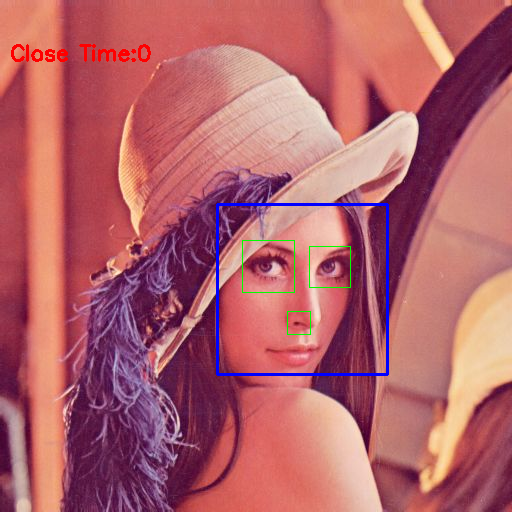

In [1]:
from PIL import Image
# 导入opencv
import cv2

# 导入人脸级联分类器引擎，'.xml'文件里包含训练出来的人脸特征，cv2.data.haarcascades即为存放所有级联分类器模型文件的目录
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades+'haarcascade_frontalface_default.xml')

# 导入人眼级联分类器引擎吗，'.xml'文件里包含训练出来的人眼特征
eye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades+'haarcascade_eye.xml')

smile_cascade = cv2.CascadeClassifier(cv2.data.haarcascades+'haarcascade_smile.xml')

# 初始化闭眼时间
close_time = 0

# 读入一张图片，引号里为图片的路径，需要你自己手动设置
img = cv2.imread('./images/lena.jpg')

# 用人脸级联分类器引擎进行人脸识别，返回的faces为人脸坐标列表，1.3是放大比例，5是重复识别次数
faces = face_cascade.detectMultiScale(img, 1.3, 5)

# 对每一张脸，进行如下操作
for (x, y, w, h) in faces:
    # 画出人脸框，蓝色（BGR色彩体系），画笔宽度为2
    img = cv2.rectangle(img, (x, y), (x+w, y+h), (255, 0, 0), 2)
    # 框选出人脸区域，在人脸区域而不是全图中进行人眼检测，节省计算资源
    face_area = img[y:y+h, x:x+w]
    eyes = eye_cascade.detectMultiScale(face_area)
    
    # 用人眼级联分类器引擎在人脸区域进行人眼识别，返回的eyes为眼睛坐标列表
    for (ex, ey, ew, eh) in eyes:
        # 画出人眼框，绿色，画笔宽度为1
        cv2.rectangle(face_area, (ex, ey), (ex+ew, ey+eh), (0, 255, 0), 1)

        # 疲劳检测
        if len(eyes) == 0 and len(faces) != 0:
            # 增加闭眼时长
            close_time += 1
            
        # 如果检测到脸并检测到眼睛———>判断用户睁眼
        elif len(eyes) != 0 and len(faces) == 0:
            # 重置闭眼时间
            close_time = 0
            
# 如果闭眼时间达到计数50则判断为劳累
if close_time >= 50:
    # 闭眼过长则一直输出
    print("闭眼过长——>劳累")
    cv2.putText(img, "Tired", (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 1.0, (0, 0, 255), 2)
    
# 显示识别结果和闭眼时间
cv2.putText(img, f'Close Time:{close_time}', (10, 60), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 0, 255), 2)
Image.fromarray(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
